# Learning From Data - Final Exam
## Ognen Nastov

![](final_images/finalp1.png)

**Answer:**

- For $Q=1$, $z = (1, x_1, x_2)$

- For $Q=2$, $z = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$

Etc.

Not counting the $x_0=1$, when $Q$ increases by $1$, we have additional terms $x_1^i x_2^j$ with $i+j=Q$. The number of such terms is equal to the number of solutions to the equation.

Analogous problem: how many ways can $Q$ pieces of candy be divided among $d$ children. Or how many $Q$ indistinguishable stars can be put into $d$ distinguishable bins.

Represent the $Q$ candies as `*`, and represent the dividers specifying the bins as `|`. There are $d$ bins, thus there are $d-1$ dividers.

E.g. for $Q=2$ and $d=2$, the set of configurations is: \{`**|` , `*|*` , `|**`\} which has 3 elements.

The number of total objects (stars and dividers) is $Q+d-1$. Choosing the positions of the dividers leaves exactly $Q$ positions left for the stars. Thus, the number of different configurations is given by the $Q$ combinations of $Q+d-1$ configurations, i.e.

$$\text{# of ways} = \binom{Q+d-1}{d-1} = \frac{(Q+d-1)!}{Q! (d-1)!}$$

If $d=2$, # ways = $\binom{Q+d-1}{d-1} = Q+1$

The total number of terms for $Q=10$ is therefore the sum $2+3+...+11$, i.e.

$$\text{dimensionality of Z} = \sum_{i=2}^{11} i  = \sum_{i=1}^{11} i - 1 = \frac{11*12}{2} - 1 = 65$$

The answer is none of the above, i.e. [e].

---

Problem 1 alternate answer:

Dimensionality of poly transform of order $Q$ is given by $\tilde{d} = \frac{Q(Q+3)}{2} = \frac{10*13}{2} = 65$

(See book pp. 104 for reference.)

---

![](final_images/finalp2.png)

**Answer:**

[a] A singleton $H$ with one hypothesis $h$, has $\bar{g} = h$, thus $\bar{g} \in H$.

[b] For $H$ being the set of all constant real valued hypotheses, the average of any number of $h \in H$ will result also in a constant real valued hypothesis from the set, thus $\bar{g} \in H$.

[c] For $H$ being the linear regression model, $h(x) = w^T x$. The average of these linear functions is also a linear function:

$$\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x)) = \frac{1}{2}(w_1^T x + w_2^T x) = \frac{1}{2}(w_1^T + w_2^T)x$$

[d] For $H$ being the logistic regression model, $h(x) = \theta(w^T x)$ with $\theta(s) = \frac{e^s}{1+e^s}$:

$$h(x) = \frac{e^{w^T x}}{1+e^{w^T x}}$$

For the average $\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x))$ to be representable as a logistic regression model, we need:

$$\bar{g}(x) = \frac{1}{2}(h_1(x) + h_2(x)) = \frac{1}{2} \left( \frac{e^{w_1^T x}}{1+e^{w_1^T x}} + \frac{e^{w_2^T x}}{1+e^{w_2^T x}} \right)$$

to be equal to:

$$\frac{e^{w^T x}}{1+e^{w^T x}}$$

which will not always be the case, and $\bar{g} \notin H$.

Thus, answer is [d].

---

![](final_images/finalp3.png)

**Answer:**

[a] True.

[b] True.

[c] True.

[d] False.

[e] True.

The answer is [d].

---

![](final_images/finalp4.png)

**Answer:**

[a] False.

[b] False.

[c] False.

[d] True.

[e] False.

The answer is [d].

---

![](final_images/finalp5.png)

**Answer:**

$w_{lin}$ is the solution to the unconstrained minimization problem:

$$\min \frac{1}{N} \sum_{n=1}^N (w^T x_n - y_n)^2$$

$w_{reg}$ is the solution to the constrained minimization problem:

$$\min \frac{1}{N} \sum_{n=1}^N (w^T x_n - y_n)^2$$ 

subject to $w^T \Gamma^T \Gamma w \leq C$

If $w_{lin}^T \Gamma^T \Gamma w_{lin} \leq C$, meaning $w_{lin}$ satisfies the constraint in the constrained problem, then $w_{lin}$ is the solution to the constrained problem.

It follows that $w_{lin} = w_{reg}$.

Answer is [a].

---

![](final_images/finalp6.png)

[a] written as hard-order constraints.

- Not true as the soft order constraint does not limit the orders.

[b] translated into augmented error. 

- This is true as the constrained problem is equivalent to the augmented error unconstrained problem. The soft-order constraint in the constrained problem becomes a penalty term in the augmented error unconstrained problem.

[c] determined from the value of the VC dimension.

- Not true. 

[d] used to decrease both $E_{in}$ and $E_{out}$.

- Not true. It is used to decrease both $E_{out}$ (avoid overfitting) and the augmented error $E_{aug}$. The $E_{in}$ may increase.
 
[e] None of the above is true.

- Not true.

Answer is [b].


---

![](final_images/finalp7a.png)
![](final_images/finalp7b.png)

**Answer:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# problems 7-10

# read handwritten digits input and test sets
# format of each row is: digit intensity symmetry
# d = 2
# return X,Y where X = [[x1, ...]] and Y = [y1, ...]
def read_training_set():
    S = np.loadtxt("http://www.amlbook.com/data/zip/features.train")
    return S[:,1:3], S[:,0]

def read_test_set():
    S = np.loadtxt("http://www.amlbook.com/data/zip/features.test")
    return S[:,1:3], S[:,0]

In [3]:
def no_transform_input_set(X):
    N = np.size(X, 0)
    X0 = np.ones([N,])
    X1 = X[:,0]
    X2 = X[:,1]
    X_no_transform = np.array([X0, X1, X2]).T
    return (X_no_transform)

# transformed input set is d = 7
def transform_input_set(X):
    N = np.size(X, 0)
    X0 = np.ones([N,])
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1*X2
    X4 = X1**2
    X5 = X2**2
    X_transformed = np.array([X0, X1, X2, X3, X4, X5]).T
    return (X_transformed)

In [4]:
# make Y for one-vs-all classification
# Y is +1 for selected digit, and -1 for the rest of the digits
def make_Y_ova(digit, Y):
    Y_ova = (Y == digit)*(+1.0) + (Y != digit)*(-1.0)
    return Y_ova
  
# make Y for one-vs-one classification
# Y is +1 for digit_1, and -1 for digit_2
# the rest of digits are ignored
def make_X_Y_ovo(digit_1, digit_2, X, Y):
    Y_ovo = (Y == digit_1)*(+1.0) + (Y == digit_2)*(-1.0) + \
    ((Y != digit_1) & (Y != digit_2))*(0.0)
    indices_to_be_deleted = np.nonzero(Y_ovo == 0.0)
    Y_ovo_trunc = np.delete(Y_ovo, indices_to_be_deleted)
    X_ovo_trunc = np.delete(X, indices_to_be_deleted, axis=0)
    return X_ovo_trunc, Y_ovo_trunc

In [5]:
def solve_regression_with_reg(X, Y, _lambda):
    w = np.dot(np.linalg.inv(X.T@X + _lambda*np.eye(np.size(X, axis=1)))@X.T, Y)
    return (w)

# classification error
def classification_error(w, X, y):
    y_c = np.sign(np.dot(X,w))
    error = np.count_nonzero(y_c != y) / len(y)
    return (error)

In [6]:
def problems_7_to_9(transform=False, _lambda=1.0):
    results = []
    X, Y = read_training_set()
    X_t, Y_t = read_test_set()
    if transform:
        X_train = transform_input_set(X)
        X_test = transform_input_set(X_t)
    else:
        X_train = no_transform_input_set(X)
        X_test = no_transform_input_set(X_t)
    for digit in range(0,10):
        classifier = str(digit) + "_vs_all"
        Y_ova_train = make_Y_ova(digit, Y)
        Y_ova_test = make_Y_ova(digit, Y_t)
        w = solve_regression_with_reg(X_train, Y_ova_train, _lambda)
        Ein = classification_error(w, X_train, Y_ova_train)
        Eout = classification_error(w, X_test, Y_ova_test)
        result = {"classifier": classifier,
                  "transform": transform,
                  "lambda": _lambda,
                  "E_in": Ein,
                  "E_out": Eout}
        results.append(result)
    return results

In [7]:
results = problems_7_to_9(transform=False, _lambda=1.0)
pd.DataFrame(results)

,classifier,transform,lambda,E_in,E_out
0,0_vs_all,False,1.0,0.109313,0.115097
1,1_vs_all,False,1.0,0.015224,0.022422
2,2_vs_all,False,1.0,0.100261,0.098655
3,3_vs_all,False,1.0,0.090248,0.082711
4,4_vs_all,False,1.0,0.089425,0.099651
5,5_vs_all,False,1.0,0.076258,0.079721
6,6_vs_all,False,1.0,0.091071,0.084704
7,7_vs_all,False,1.0,0.088465,0.073244
8,8_vs_all,False,1.0,0.074338,0.082711
9,9_vs_all,False,1.0,0.088328,0.088191


Out of the `5_vs_all` through `9_vs_all` classifiers, the lowest `E_in` is found for `8_vs_all`.

Answer is [d].

---

![](final_images/finalp8.png)

**Answer:**

In [8]:
results2 = problems_7_to_9(transform=True, _lambda=1.0)
pd.DataFrame(results2)

,classifier,transform,lambda,E_in,E_out
0,0_vs_all,True,1.0,0.102318,0.106627
1,1_vs_all,True,1.0,0.012344,0.021923
2,2_vs_all,True,1.0,0.100261,0.098655
3,3_vs_all,True,1.0,0.090248,0.082711
4,4_vs_all,True,1.0,0.089425,0.099651
5,5_vs_all,True,1.0,0.076258,0.079223
6,6_vs_all,True,1.0,0.091071,0.084704
7,7_vs_all,True,1.0,0.088465,0.073244
8,8_vs_all,True,1.0,0.074338,0.082711
9,9_vs_all,True,1.0,0.088328,0.088191


Out of the `0_vs_all` through `4_vs_all` classifiers, the lowest `E_out` is found for `1_vs_all`.

Answer is [b].

---

![](final_images/finalp9a.png)
![](final_images/finalp9b.png)

**Answer:**

[a] Overfitting always occurs when we use the transform. 

- Not true.

[b] The transform always improves the out-of-sample performance by at least 5% ($E_{out}$ with transform $ \leq 0.95E_{out}$ without transform).

- Let's check:

In [9]:
100*(pd.DataFrame(results)['E_out'] - pd.DataFrame(results2)['E_out'])/pd.DataFrame(results)['E_out']

0    7.359307
1    2.222222
2    0.000000
3    0.000000
4    0.000000
5    0.625000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: E_out, dtype: float64

- Not true: there is improvement in `E_out` only for `0_vs_all`, `1_vs_all`, and `5_vs_all`.

[c] The transform does not make any difference in the out-of-sample performance. 

- Not true: There is improvement in `E_out` for `0_vs_all`, `1_vs_all`, and `5_vs_all`. 

[d] The transform always worsens the out-of-sample performance by at least 5%. 

- Not true.

[e] The transform improves the out-of-sample performance of ‘5 versus all,’ but by less than 5%. 

- True, as the `5_vs_all` `E_out` performance is improved by 0.625%.

Answer is [e].

---

![](final_images/finalp10.png)

**Answer:**

In [10]:
def problem_10(digit_1, digit_2, transform=False, _lambda=1.0):
    results = []
    classifier = str(digit_1) + "_vs_" +str(digit_2)
    X, Y = read_training_set()
    X_t, Y_t = read_test_set()
    if transform:
        X_train = transform_input_set(X)
        X_test = transform_input_set(X_t)
    else:
        X_train = no_transform_input_set(X)
        X_test = no_transform_input_set(X_t)
    X_ovo_train, Y_ovo_train = make_X_Y_ovo(digit_1, digit_2, X_train, Y)
    X_ovo_test, Y_ovo_test = make_X_Y_ovo(digit_1, digit_2, X_test, Y_t)
    w = solve_regression_with_reg(X_ovo_train, Y_ovo_train, _lambda)
    Ein = classification_error(w, X_ovo_train, Y_ovo_train)
    Eout = classification_error(w, X_ovo_test, Y_ovo_test)
    result = {"classifier": classifier,
              "transform": transform,
              "lambda": _lambda,
              "E_in": Ein,
              "E_out": Eout}
    results.append(result)
    return results

For $\lambda = 1$:

In [11]:
results3 = problem_10(1, 5, transform=True, _lambda=1.0)
pd.DataFrame(results3)

,classifier,transform,lambda,E_in,E_out
0,1_vs_5,True,1.0,0.005125,0.025943


For $\lambda = 0.01$:

In [12]:
results4 = problem_10(1, 5, transform=True, _lambda=0.01)
pd.DataFrame(results4)

,classifier,transform,lambda,E_in,E_out
0,1_vs_5,True,0.01,0.004484,0.028302


[a] Overfitting occurs (from $λ=1$ to $λ=0.01$). 

- This is true as `E_out` increases.

[b] The two classifiers have the same $E_{in}$.

- Not true.

[c] The two classifiers have the same $E_{out}$.

- Not true.

[d] When $λ$ goes up, both $E_{in}$ and $E_{out}$ go up.

- Not true. When `lambda` ⬆️, `E_in` ⬆️, and `E_out` ⬇️.

[e] When $λ$ goes up, both $E_{in}$ and $E_{out}$ go down.

- Not true. When `lambda` ⬆️, `E_in` ⬆️, and `E_out` ⬇️.

Answer is [a].

---

![](final_images/finalp11.png)

**Answer:**

In [13]:
# data set for problems 11-12
# row format is x1, x2, y
# returns X, Y
def make_training_set_problems_11_12():
    data = np.array([[1, 0, -1],
                     [0, 1, -1],
                     [0, -1, -1],
                     [-1, 0, 1],
                     [0, 2, 1],
                     [0, -2, 1],
                     [-2, 0, 1]])
    return data[:,0:2], data[:,2]

In [14]:
def transform_input_set_problems_11_12(X):
    X1 = X[:,0]
    X2 = X[:,1]
    Z1 = X2**2 - 2*X1 - 1
    Z2 = X1**2 - 2*X2 + 1
    Z = np.array([Z1, Z2]).T
    return (Z)

In [15]:
import matplotlib.pyplot as plt

In [16]:
# problem 11
def problem_11(transform=False, sep_planes=False):
    X, Y = make_training_set_problems_11_12()
    x_lab, y_lab = ('$x_{1}$', '$x_{2}$')
    if transform:
        X = transform_input_set_problems_11_12(X)
        x_lab, y_lab = ('$z_{1}$', '$z_{2}$')
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            plt.plot(X[i,0], X[i,1], 'bo')
        else:
            plt.plot(X[i,0], X[i,1], 'ro')
    plt.xlabel(x_lab);
    plt.ylabel(y_lab);
    plt.grid()
    if sep_planes:
        planes = {'(a)' : (-1, 1, -0.5),
                  '(b)' : (1, -1, -0.5), 
                  '(c)' : (1, 0, -0.5), 
                  '(d)' : (0, 1, -0.5)}
        x = np.linspace(-6, 6)
        for key, val in planes.items():
            slope = - val[0] / (val[1] + 1e-10)
            b = - val[2] / (val[1] + 1e-10)
            y =  slope * x + b
            plt.plot(x, y, label=f"{key}")
            plt.legend(loc='lower right')
            plt.xlim(-6, 6);
            plt.ylim(-6, 6);

The hyperplane separates the data only if for $n = 1,\cdots,7$:

$$y_n(w^T z + b) > 0$$

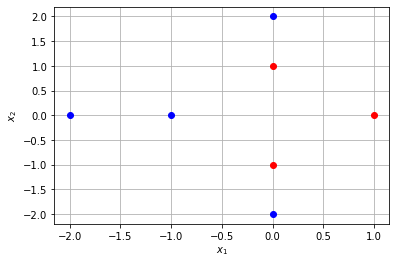

In [17]:
problem_11(transform=False, sep_planes=False)

It can be seen the original training data in $X$ space is not linearly separable.

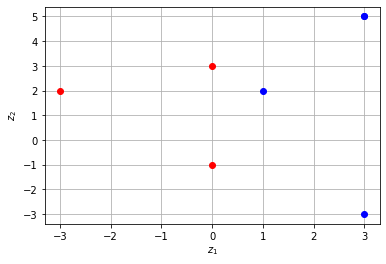

In [18]:
problem_11(transform=True, sep_planes=False)

The transformed training data in $Z$ space is now linearly separable.

Plot the 4 hyperplanes for [a] through [d]:

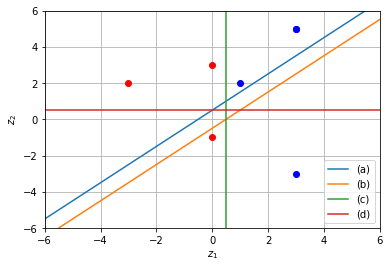

In [19]:
problem_11(transform=True, sep_planes=True)

From the plot the only hyperplane that separates the data is [c].

- It is orthogonal to the weight vector $w = [1.0, 0.0]$. 

- It separates the data with the maximum margin (as it bisects the closest points of the two classes), and that margin is 1.

=> Answer is [c].

---

![](final_images/finalp12.png)

**Answer:**

Implement hard margin SVM with the polynomial kernel using the `sklearn (libsvm)` package:

In [20]:
# problem 12
from sklearn import svm

In [21]:
# hard margin SVM (set C = 1e10) with poly kernel, use sklearn package
# no transform    
def svm_hard_poly(Q):
    clf = svm.SVC(C=1e10, kernel='poly', degree=Q, gamma=1.0, coef0=1.0)
    return clf

In [22]:
def problem_12():
    X, Y = make_training_set_problems_11_12()
    clf = svm_hard_poly(2)
    clf.fit(X, Y)
    num_support_vectors = np.size(clf.support_)
    support_vectors = clf.support_vectors_
    # dual_coef_ is the vector of products y_i*alpha_i
    # alphas are positive, thus:
    sv_outputs = np.sign(clf.dual_coef_)
    print(f'b = {clf.intercept_}')
    print(f"alphas = \n{sv_outputs*clf.dual_coef_}")
    print(f"support vectors = \n{support_vectors}")
    print(f"# support vectors = {num_support_vectors}")
    return num_support_vectors

In [23]:
problem_12()

b = [-1.66633088]
alphas = 
[[0.59647182 0.81065085 0.8887034  0.20566488 0.31275439]]
support vectors = 
[[ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]]
# support vectors = 5


5

Answer is [c].

---

![](final_images/finalp13a.png)
![](final_images/finalp13b.png)

**Answer:**

In [24]:
# problems 13-18 common code
def make_training_set_problems_13_to_18(N=100):
    X = np.zeros([N,2])
    Y = np.zeros([N,1])
    X[:,0] = np.random.uniform(-1.0, 1.0, N)
    X[:,1] = np.random.uniform(-1.0, 1.0, N)
    x1 = X[:,0]
    x2 = X[:,1]
    Y = np.sign(x1 - x2 + 0.25 * np.sin(np.pi * x1))
    return X, Y

In [25]:
# RBF kernel form (hard-margin SVM with RBF kernel)
def svm_hard_rbf():
    clf = svm.SVC(C=1e10, kernel='rbf', gamma=1.5)
    return clf

In [26]:
import time

# problem 13
def problem_13():
    time_start = time.time()
    trials = 100
    count_non_sep = 0
    clf = svm_hard_rbf()
    for i in range(0, trials):
        X, Y = make_training_set_problems_13_to_18()
        clf.fit(X, Y)
        Y_model = clf.predict(X)
        Ein = np.count_nonzero(Y != Y_model) / len(Y)
        if Ein > 0.0:
            count_non_sep += 1
    percent_non_sep = count_non_sep / trials
    print(f"Non-separable {percent_non_sep}% of the time.")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [27]:
problem_13()

Non-separable 0.0% of the time.
Run time = 0.1 seconds.


Answer is [a].

---

![](final_images/finalp14.png)

**Answer:**

Use the `sklearn` implemetation of Lloyd's algorithm:

In [28]:
from sklearn.cluster import KMeans

In [29]:
# Lloyd's algorithm: cluster inputs into K clusters
def kmeans(K):
    kms = KMeans(n_clusters=K, init='random', algorithm='full')
    return kms

Test the Lloyd's algorithm on the small (N=7) data set from problems 11-12:

In [30]:
# test KMeans on the small (N=7) data set from problems 11-12
def test_kmeans(K=3):
    X, Y = make_training_set_problems_11_12()
    kms = kmeans(K)
    kms.fit(X)
    mu = kms.cluster_centers_
    labels = kms.labels_
    return mu, labels

In [31]:
test_kmeans(K=3)

(array([[ 0.        ,  1.5       ],
        [ 0.33333333, -1.        ],
        [-1.5       ,  0.        ]]),
 array([1, 0, 1, 2, 0, 1, 2], dtype=int32))

Implement RBF regular form. It uses Lloyd's algorithm and computes the solution using the pseudo-inverse:

In [32]:
# RBF regular form (Lloyd's + pseudo-inverse)
def phi_matrix(X, mu, gamma):
    N = len(X)
    K = len(mu)
    phi = np.zeros([N, K+1])
    for row in range(0, N):
        for col in range(0, K+1):
            if col == 0:
                phi[row, col] = 1.0
            else:
                phi[row, col] = \
                    np.exp(-gamma * (np.linalg.norm(X[row] - mu[col-1])**2))
    return phi

In [33]:
def solve_rbf(phi, y):
    w = np.linalg.inv(phi.T @ phi) @ (phi.T @ y)
    return w

Common code for problems 14 and 15:

In [34]:
# problems 14 & 15
def problems_14_and_15(K):
    time_start = time.time()
    trials = 100
    N_test = 10000
    svm_wins = 0
    Eout_svm = 0
    Eout_rbf = 0
    gamma = 1.5
    clf = svm_hard_rbf()
    kms = kmeans(K)
    for i in range(0, trials):
        X, Y = make_training_set_problems_13_to_18()
        # hard-margin svm with rbf kernel
        clf.fit(X, Y)
        Y_model = clf.predict(X)
        Ein_svm = np.count_nonzero(Y != Y_model) / len(Y)
        # repeat this run if Ein > 0
        if Ein_svm > 0.0:
            continue
        # regular rbf
        kms.fit(X)
        mu = kms.cluster_centers_
        phi = phi_matrix(X, mu, gamma)
        w = solve_rbf(phi, Y)
        Ein_rbf = classification_error(w, phi, Y)
        # test set
        X_test, Y_test = make_training_set_problems_13_to_18(N_test)
        Y_model_test = clf.predict(X_test)
        Eout_svm = np.count_nonzero(Y_test != Y_model_test) / len(Y_test)
        phi_test = phi_matrix(X_test, mu, gamma)
        Eout_rbf = classification_error(w, phi_test, Y_test)
        # compare Eout
        if Eout_svm < Eout_rbf:
            svm_wins +=1
        perc_complete = 100 * i / trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
    percent_wins = 100 * svm_wins / trials
    print(f"Kernel form beats regular form {percent_wins}% of the time.")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [35]:
problems_14_and_15(9)

Kernel form beats regular form 91.0% of the time.
Run time = 242.9 seconds.


Answer is [e].

---

![](final_images/finalp15.png)

**Answer:**

In [36]:
problems_14_and_15(12)

Kernel form beats regular form 85.0% of the time.
Run time = 387.1 seconds.


Answer is [d].

---

![](final_images/finalp16a.png)
![](final_images/finalp16b.png)

**Answer:**

Common code for problems 16 and 17:

In [37]:
# problems 16 & 17
def problems_16_and_17(K_list, gamma_list):
    time_start = time.time()
    trials = 100
    N_test = 10000
    Ein_down_Eout_up = 0
    Ein_up_Eout_down = 0
    both_up = 0
    both_down = 0
    both_same = 0
    for i in range(0, trials):
        Ein_list = []
        Eout_list = []
        for K in K_list:
            for gamma in gamma_list:
                X, Y = make_training_set_problems_13_to_18()
                # regular rbf
                kms = kmeans(K)
                kms.fit(X)
                mu = kms.cluster_centers_
                phi = phi_matrix(X, mu, gamma)
                w = solve_rbf(phi, Y)
                Ein = classification_error(w, phi, Y)
                # test set
                X_test, Y_test = make_training_set_problems_13_to_18(N_test)
                phi_test = phi_matrix(X_test, mu, gamma)
                Eout = classification_error(w, phi_test, Y_test)
                # store Ein and Eout
                Ein_list.append(Ein)
                Eout_list.append(Eout)
        # compare Ein and Eout
        if (Ein_list[1] < Ein_list[0]) and (Eout_list[1] > Eout_list[0]):
            Ein_down_Eout_up += 1
        elif (Ein_list[1] > Ein_list[0]) and (Eout_list[1] < Eout_list[0]):
            Ein_up_Eout_down += 1
        elif (Ein_list[1] > Ein_list[0]) and (Eout_list[1] > Eout_list[0]):
            both_up += 1
        elif (Ein_list[1] < Ein_list[0]) and (Eout_list[1] < Eout_list[0]):
            both_down += 1
        else:
            both_same += 1
        perc_complete = 100 * i / trials
        # this line does not work without the \r in the beginning
        print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
    print(f"Ein down, Eout up = {Ein_down_Eout_up}")
    print(f"Ein up, Eout down = {Ein_up_Eout_down}")
    print(f"Both Ein and Eout up = {both_up}")
    print(f"Both Ein and Eout down = {both_down}")
    print(f"Ein and Eout remain same = {both_same}")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return

In [38]:
problems_16_and_17(K_list=[9, 12], gamma_list=[1.5])

Ein down, Eout up = 21
Ein up, Eout down = 18
Both Ein and Eout up = 20
Both Ein and Eout down = 28
Ein and Eout remain same = 13
Run time = 616.5 seconds.


Answer is [d].

---

![](final_images/finalp17.png)

**Answer:**

In [39]:
problems_16_and_17(K_list=[9], gamma_list=[1.5, 2.0])

Ein down, Eout up = 15
Ein up, Eout down = 16
Both Ein and Eout up = 37
Both Ein and Eout down = 13
Ein and Eout remain same = 19
Run time = 612.1 seconds.


Answer is [c].

---

![](final_images/finalp18.png)

**Answer:**

In [40]:
# problem 18
def problem_18(K=9, gamma=1.5):
    time_start = time.time()
    trials = 100
    Ein_is_zero = 0
    for i in range(0, trials):
         X, Y = make_training_set_problems_13_to_18()
         # regular rbf
         kms = kmeans(K)
         kms.fit(X)
         mu = kms.cluster_centers_
         phi = phi_matrix(X, mu, gamma)
         w = solve_rbf(phi, Y)
         Ein = classification_error(w, phi, Y)
         if Ein == 0:
             Ein_is_zero += 1
         perc_complete = 100 * i / trials
         # this line does not work without the \r in the beginning
         print(f'\rJob {perc_complete:3.1f}% complete.', end='\r', flush=True)
    Ein_is_zero_perc = 100 * Ein_is_zero / trials
    print(f"Ein is zero {Ein_is_zero_perc}% of the time.")
    time_end = time.time()
    print(f"Run time = {(time_end - time_start):3.1f} seconds.")
    return 

In [41]:
problem_18()

Ein is zero 5.0% of the time.
Run time = 10.0 seconds.


Answer is [a].

---

![](final_images/finalp19.png)

**Answer:**

- $P(h=f)$ is the prior, uniform over $h \in [0,1]$.
- $P(h=f|D)$ is the posterior.
- $P(D|h=f)$ is the likelihood.

Note that:

$$P(h=f|D) = \frac{P(D|h=f) P(h=f)}{P(D)} ∝ P(D|h=f) P(h=f)$$

$P(D|h=f)$ is: given we have the proper hypothesis, what is the probability of our data? 

Our data set is just +1 for had heart attack and thus its probability is just simply the probability of predicting somebody getting a heart attack. 

Thus, as $h$ increases over $[0,1]$, the probability of predicting +1 increases over $[0,1]$ in a linear fashion.

---

![](final_images/finalp20.png)

**Answer:**

Inequalities to possibly use:
 
Inequality of arithmetic and geometric means (AM-GM inequality):

$$\sqrt{uv} \leq \frac{u+v}{2}$$ 

Cauchy inequality (vectors $u$ and $v$):

$$|<u,v>| \leq ||u|| ||v||$$

Triangle inequality:

$$||u+v|| \leq ||u||+||v||$$

Reverse triangle inequality:

$$| ||u||-||v|| | \leq ||u-v||$$

Let's check case [c]:

[c] $E_{out}(g)$ cannot be worse than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.

$$N E_{out}(g_1) = (y-g_1)^2$$

$$N E_{out}(g_2) = (y-g_2)^2$$

$$\begin{aligned}
N E_{out}(g) & = \left( y-\frac{1}{2}(g_1+g_2) \right)^2 \\
& = y^2 - y(g_1+g_2) + \frac{1}{4}(g_1+g_2)^2 \\
& = y^2 - y g_1 - y g_2 + \frac{1}{4}g_1^2 + \frac{1}{4}g_2^2 + \frac{1}{2}g_1 g_2 \\
& = \frac{1}{2}\left[ 2 y^2 - 2 y g_1 - 2 y g_2 + \frac{1}{2}g_1^2 + \frac{1}{2}g_2^2 + g_1 g_2 \right] \\ 
& = \frac{1}{2}\left[ (y^2 - 2 y g_1 + g_1^2) + (y^2 - 2 y g_2 + g_2^2) - \frac{1}{2}g_1^2 - \frac{1}{2}g_2^2 + g_1 g_2 \right] \\
& = \frac{1}{2} \left[ (y-g_1)^2 + (y-g_2)^2 - \frac{1}{2}(g_1^2 + g_2^2 - 2 g_1 g_2) \right] \\
& = \frac{N}{2}\left[ E_{out}(g_1) + E_{out}(g_2) - \frac{1}{2N} (g_1-g_2)^2 \right]
\end{aligned}$$

i.e. we get:

$$E_{out}(g) = \frac{1}{2}\left[ E_{out}(g_1) + E_{out}(g_2) \right] - \frac{1}{4N} (g_1-g_2)^2$$

So $E_{out}(g)$ is always less than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.

The statement [c] is true.

Answer is [c].


---